# 🚀 Übung: Zeitreihe Personalentwicklung

In den vorangegangenen Übungen konnten wir verschiedene Fragen nach der Qualität der Daten und der Reproduzierbarkeit beantworten. 

Doch wie steht es eigentlich um unsere Forschungsfrage:

> Wie hat sich die Zusammensetzung des Personals an Hochschulen in Deutschland im letzten Jahrzehnt (2010-2020) entwickelt?

Um diese Frage beantworten zu können, reicht unsere Raw-Data Datei nicht aus, da diese nur die Daten für das Jahr 2020 enthält.
Das Open-Data-Portal von <a href="https://www-genesis.destatis.de" class="external-link" target="_blank">Destatis</a> bietet jedoch auch die Möglichkeiten, die Daten für alle Jahre von 2010 bis 2020 herunterzuladen
oder Sie laden den Datensatz [hier](Data/21341-0001_F_2010-2020.csv) direkt aus unserem Repositorium hierunter.

## Daten vorbereiten

Die CSV Datei können Sie nun wie in dem Abschnitt 6.3. [Übung: Arbeiten mit CSV-Dateien in R](/Markdown/6_2_Übung_Arbeiten_CSV_in_R.ipynb) einlesen und in Daten und Metadaten unterteilen.

In [1]:
#Benötigtes Package zum Start der Session laden, damit alle hier verwendeteten Befehle verfügbar sind
library(tidyverse) 

#Daten einlesen
data_csv_clean <- read.csv2("Data/21341-0001_F_2010-2020.csv", header = FALSE, encoding = "latin1")

#Datenkategorie setzten
Metadaten <- data_csv_clean[c(1:6, 87:88), 1]
Tabellendaten <- data_csv_clean[8:85, 1:13] #manuelles anpassen der zusätzlichen Spalten (Jahre 2010 bis 2019) nötig

#Zeilen neu beschriften
row.names(Tabellendaten) <- 1:78

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Betrachten wir nun die neuen Tabellendaten:

In [2]:
head(Tabellendaten)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Wissenschaftliches und künstlerisches Personal,männlich,208268,214232,222735,230286,236561,237107,237557,241300,244186,245452,247720
2,Wissenschaftliches und künstlerisches Personal,weiblich,116099,122870,130955,139561,144708,148204,149195,153578,157872,161207,167112
3,Wissenschaftliches und künstlerisches Personal,Insgesamt,324367,337102,353690,369847,381269,385311,386752,394878,402058,406659,414832
4,Hauptberufl. wissenschaftl. u. künstler. Personal,männlich,135125,138231,141704,145386,146556,146861,147811,151563,154020,155848,159567
5,Hauptberufl. wissenschaftl. u. künstler. Personal,weiblich,75424,79307,83410,87873,89808,92339,94587,97972,101522,104763,109708
6,Hauptberufl. wissenschaftl. u. künstler. Personal,Insgesamt,210549,217538,225114,233259,236364,239200,242398,249535,255542,260611,269275


Für ein besseres Verständnis setzten Sie wieder eine verständliche Variablenbezeichnung (Spaltenüberschriften):

In [3]:
#Schritt 1: Objekt definieren, welches in aufsteigender Reihenfolge die Beschriftungen "Angestelltenverältns_2010" bis "Angestelltenverältns_2020" enthält.
alle_Jahre <- paste("Angestelltenzahl_",sep="", 2010:2020)

#Schritt 2: Variablenbezeichnung setzen
colnames(Tabellendaten) <- c("Angestelltenverhaeltnis", "Geschlecht", alle_Jahre)

#Tabelle anzeigen lassen 
head(Tabellendaten)

,Angestelltenverhaeltnis,Geschlecht,Angestelltenzahl_2010,Angestelltenzahl_2011,Angestelltenzahl_2012,Angestelltenzahl_2013,Angestelltenzahl_2014,Angestelltenzahl_2015,Angestelltenzahl_2016,Angestelltenzahl_2017,Angestelltenzahl_2018,Angestelltenzahl_2019,Angestelltenzahl_2020
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Wissenschaftliches und künstlerisches Personal,männlich,208268,214232,222735,230286,236561,237107,237557,241300,244186,245452,247720
2,Wissenschaftliches und künstlerisches Personal,weiblich,116099,122870,130955,139561,144708,148204,149195,153578,157872,161207,167112
3,Wissenschaftliches und künstlerisches Personal,Insgesamt,324367,337102,353690,369847,381269,385311,386752,394878,402058,406659,414832
4,Hauptberufl. wissenschaftl. u. künstler. Personal,männlich,135125,138231,141704,145386,146556,146861,147811,151563,154020,155848,159567
5,Hauptberufl. wissenschaftl. u. künstler. Personal,weiblich,75424,79307,83410,87873,89808,92339,94587,97972,101522,104763,109708
6,Hauptberufl. wissenschaftl. u. künstler. Personal,Insgesamt,210549,217538,225114,233259,236364,239200,242398,249535,255542,260611,269275


Damit Sie die Tabelle im nächsten Schritt filtern können, müssen Sie wieder die unnötigen Leerzeichen mittels des `trimws()`-Befehls entfernen.

In [4]:
Tabellendaten$Angestelltenverhaeltnis <- trimws(Tabellendaten$Angestelltenverhaeltnis)

Nun Sind die Daten bereit zur Auswertung.

## Gesuchte Daten finden 

In der Forschungsfrage wird von der "Zusammensetzung des Personals an deutschen Hochschulen"" gesprochen.
Nun stellt sich die Frage, welche Personalgruppen hierfür genau beleuchtet werden sollen. Damit es übersichtlich bleibt, betrachten wir im folgenden nur die zwei Übergruppen "Wissenschaftliches und künstlerisches Personal" und "Verwaltungs-, technisches und sonstiges Personal". 

Hierfür filtern wir die Tabelle nach diesen beiden Gruppen:

In [5]:
#Tabelle filtern
Daten_basis <- filter(Tabellendaten, Angestelltenverhaeltnis == "Wissenschaftliches und künstlerisches Personal"
                     & Geschlecht =="Insgesamt" | Angestelltenverhaeltnis == "Verwaltungs-, technisches und sonstiges Personal"
                     & Geschlecht =="Insgesamt")
#Ergbnis sichten                 
show(Daten_basis)

                           Angestelltenverhaeltnis Geschlecht
1   Wissenschaftliches und künstlerisches Personal  Insgesamt
2 Verwaltungs-, technisches und sonstiges Personal  Insgesamt
  Angestelltenzahl_2010 Angestelltenzahl_2011 Angestelltenzahl_2012
1                324367                337102                353690
2                277315                282131                286331
  Angestelltenzahl_2013 Angestelltenzahl_2014 Angestelltenzahl_2015
1                369847                381269                385311
2                292229                293877                299074
  Angestelltenzahl_2016 Angestelltenzahl_2017 Angestelltenzahl_2018
1                386752                394878                402058
2                304611                309729                317145
  Angestelltenzahl_2019 Angestelltenzahl_2020
1                406659                414832
2                331103                344233


## Daten auswerten 

Um mit Datenwerten rechnen zu können, ist die Klasse der Daten entscheidend. Was Variablenklassen genau sind wurde in dem Abschnitt [Übung: Arbeiten mit CSV-Dateien in R](/Markdown/6_2_Übung_Arbeiten_CSV_in_R.ipynb) bereits besprochen.

Mittels des Befehls `str()` können Sie sich schnell die Klassen anzeigen lassen:

In [6]:
str(Daten_basis)

'data.frame':	2 obs. of  13 variables:
 $ Angestelltenverhaeltnis: chr  "Wissenschaftliches und künstlerisches Personal" "Verwaltungs-, technisches und sonstiges Personal"
 $ Geschlecht             : chr  "Insgesamt" "Insgesamt"
 $ Angestelltenzahl_2010  : chr  "324367" "277315"
 $ Angestelltenzahl_2011  : chr  "337102" "282131"
 $ Angestelltenzahl_2012  : chr  "353690" "286331"
 $ Angestelltenzahl_2013  : chr  "369847" "292229"
 $ Angestelltenzahl_2014  : chr  "381269" "293877"
 $ Angestelltenzahl_2015  : chr  "385311" "299074"
 $ Angestelltenzahl_2016  : chr  "386752" "304611"
 $ Angestelltenzahl_2017  : chr  "394878" "309729"
 $ Angestelltenzahl_2018  : chr  "402058" "317145"
 $ Angestelltenzahl_2019  : chr  "406659" "331103"
 $ Angestelltenzahl_2020  : chr  "414832" "344233"


Im Folgenden wollen wir die Jahre 2010 und 2020 miteinander vergleichen, daher müssen Sie für diese Variablen die Klasse in integer oder numeric ändern.

In [7]:
Daten_basis$Angestelltenzahl_2010 <- as.integer(Daten_basis$Angestelltenzahl_2010)
Daten_basis$Angestelltenzahl_2020 <- as.integer(Daten_basis$Angestelltenzahl_2020)

**Wie hat sich der Personalbestand zwischen den Jahren 2010 und 2020 verändert?**

In [8]:
#Absolute Veränderung:
Daten_basis$Angestelltenzahl_2020 - Daten_basis$Angestelltenzahl_2010

#Prozentuale veränderung:
(Daten_basis$Angestelltenzahl_2020 - Daten_basis$Angestelltenzahl_2010) / Daten_basis$Angestelltenzahl_2010 * 100

[1] 90465 66918

[1] 27.88971 24.13068

**Antwort:**
Der absolute Personalbestand an deutschen Hochschulen hat sich wie folgt verändert:

- Zwischen den Jahren 2010 und 2020 hat sich der Personalbestand von *wissenschaftlichem und künstlerischem Personal* um 90.465 erhöht. Dies entspricht einer Erhöhung um 27,89%.
- Zwischen den Jahren 2010 und 2020 hat sich der Personalbestand von *Verwaltungs-, technischem und sonstigem Personal* um 66.918 erhöht. Dies entspricht einer Erhöhung um 24,13%.

**Wie groß ist der prozentuale Anteil der jeweiligen Gruppe am gesamten Personalbestand?**

In [9]:
#Prozentuale Zusammensetzung 2010
Daten_basis$Angestelltenzahl_2010 / sum(Daten_basis$Angestelltenzahl_2010) * 100

#Prozentuale Zusammensetzung 2020 
Daten_basis$Angestelltenzahl_2020 / sum(Daten_basis$Angestelltenzahl_2020) * 100

[1] 53.91004 46.08996

[1] 54.65039 45.34961

**Antwort:**
Die prozentuale Zusammensetzung des Personalbestandes an deutschen Hochschulen hat sich wie folgt verändert:

- Zwischen den Jahren 2010 und 2020 hat sich der Personalbestand von *wissenschaftlichem und künstlerischem Personal* von 53,91% auf 54,65% am Gesamtanteil gesteigert
- Zwischen den Jahren 2010 und 2020 hat sich der Personalbestand von *Verwaltungs-, technischem und sonstigem Personal* von 46,09% auf 45,35% am Gesamtanteil verringert.


## Daten visualisieren
Für eine visuelle Beantwortung unserer Forschungsfrage bietet das erstellen eines Liniendiagramms an.
Hierfür benötigen wir einen Datenframe welcher die folgenden Variablen spaltenweise auflistet:

- Jahre 2010 bis 2020
- Wissenschaftliches und künstlerisches Personal
- Verwaltungs-, technisches und sonstiges Personal


Dieser Aufbau ähnelt dem Aufbau unserer `Daten_basis`, jedoch müssen wir hierfür die Zeilen nun spaltenweise anordnen. Diesen Schritt nennt man "transponieren" (="spiegeln").

Der Befehl `t()` hilft uns hier raus:

In [10]:
Daten_basis_transponiert <- as.data.frame(t(Daten_basis))

#Ergbenis anzeigen lassen
show(Daten_basis_transponiert)

                                                                    V1
Angestelltenverhaeltnis Wissenschaftliches und künstlerisches Personal
Geschlecht                                                   Insgesamt
Angestelltenzahl_2010                                           324367
Angestelltenzahl_2011                                           337102
Angestelltenzahl_2012                                           353690
Angestelltenzahl_2013                                           369847
Angestelltenzahl_2014                                           381269
Angestelltenzahl_2015                                           385311
Angestelltenzahl_2016                                           386752
Angestelltenzahl_2017                                           394878
Angestelltenzahl_2018                                           402058
Angestelltenzahl_2019                                           406659
Angestelltenzahl_2020                                           414832
      

An dieser Stelle sind wir jetzt primär nur an den Zahlenwerten interessiert und wollen diese in einen neuen Datenframe überführen, welcher die wie oben beschrieben strukturieren erzeugt.

In [11]:
plot_daten <- data_frame(Jahre=2010:2020, Wissenschaft=Daten_basis_transponiert[3:13,1], Verwaltung=Daten_basis_transponiert[3:13,2])

show(plot_daten)

Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
ℹ Please use `tibble()` instead.”


# A tibble: 11 × 3
   Jahre Wissenschaft Verwaltung
   <int> <chr>        <chr>     
 1  2010 324367       277315    
 2  2011 337102       282131    
 3  2012 353690       286331    
 4  2013 369847       292229    
 5  2014 381269       293877    
 6  2015 385311       299074    
 7  2016 386752       304611    
 8  2017 394878       309729    
 9  2018 402058       317145    
10  2019 406659       331103    
11  2020 414832       344233    


Der erzeugte Datenframe entspricht nun genau der gewünschten Strukutr. Jetzt muss nur noch die Variablenklasse zu integer oder numeric geändert werden und das Liniendiagramm ist bereit, gebaut zu werden.

In [12]:
plot_daten$Wissenschaft <- as.integer(plot_daten$Wissenschaft)
plot_daten$Verwaltung <- as.integer(plot_daten$Verwaltung)

Zur Visulaiserung von Daten in **R** empfiehlt sich die Verwendung der `ggplot`-Funktion und der dazugehörigen Spezifizierungen.

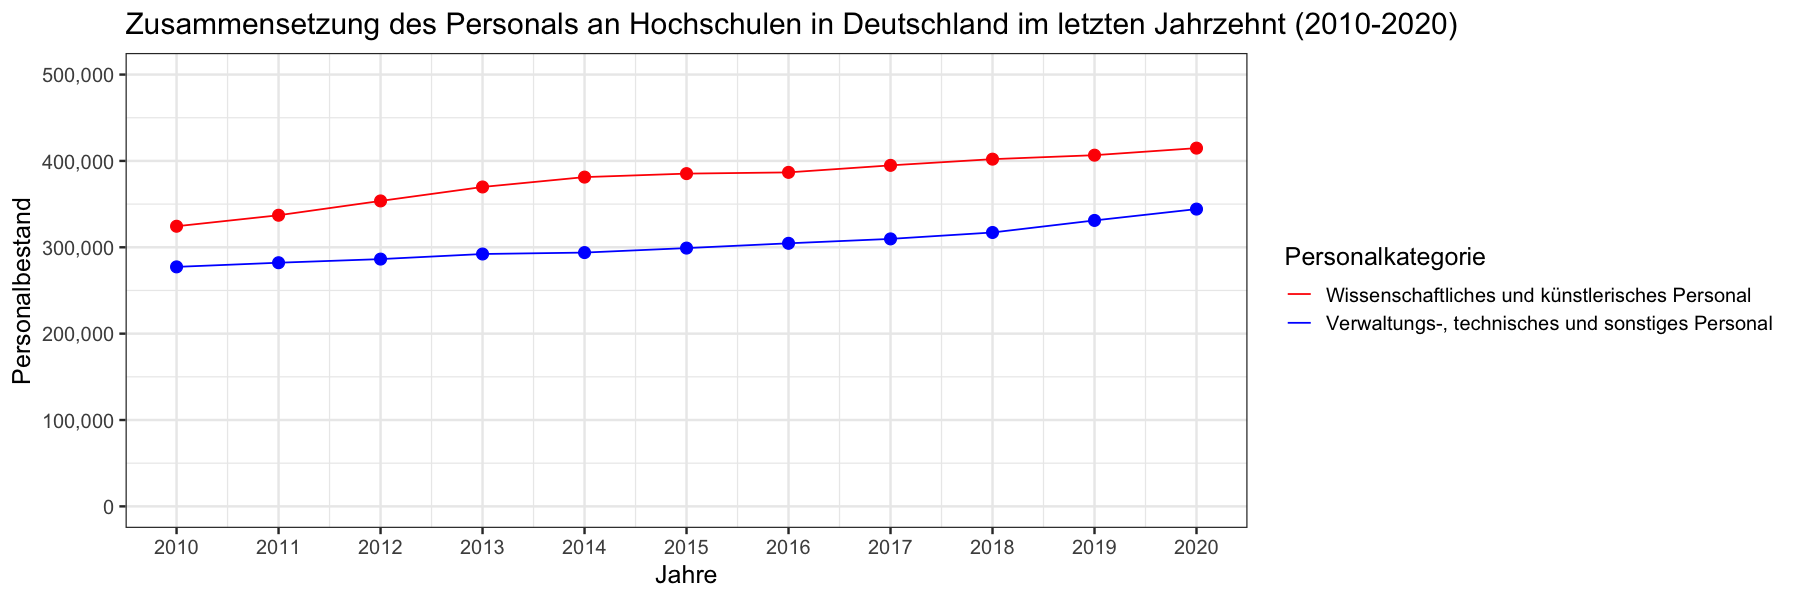

In [13]:
options(repr.plot.width=15, repr.plot.height=5) # Größe des Plots definieren

ggplot(plot_daten, aes(x = Jahre))+ #Setzen der Datenbasis und X-Achse
  geom_line(aes(y=Wissenschaft, color = "red"))+ #Linie für Varaible "Wissenschaft"" erzeugen
  geom_point(aes(y=Wissenschaft), size = 3, color = "red")+ #Punkte zur Linie hinzufügen
  geom_line(aes(y=Verwaltung, color = "blue"))+ #Linie für Varaible "Verwaltung"" erzeugen
  geom_point(aes(y=Verwaltung), size = 3, color = "blue")+ #Punkte zur Linie hinzufügen
  scale_x_continuous(breaks = 2010:2020)+ #Abschnitte für X-Achse definieren
  theme_bw(base_size = 15)+ #Layout bzw. Theme setzen
  scale_y_continuous("Personalbestand", limits=c(0,500000),labels = scales::comma)+ #Y-Achse beschriften und Wertebereich setzen.
  ggtitle("Zusammensetzung des Personals an Hochschulen in Deutschland im letzten Jahrzehnt (2010-2020)")+ #Diagrammtitel setzen
  scale_color_identity(name = "Personalkategorie",
                       breaks = c("red", "blue"),
                       labels = c("Wissenschaftliches und künstlerisches Personal", "Verwaltungs-, technisches und sonstiges Personal"),
                       guide = "legend"
                       ) #Legende setzen

In dem erzeugten Liniendiagramm lässt sich die Erhöhung des Bestandes beider Personalgruppen leicht ablesen.

## Beantwortung der Forschungsfrage

Zuletzt bleibt nun nur noch eine zusammenfassende Antwort auf unsere Forschungsfrage aus.

```{admonition} Forschungsfrage
:class: keypoint
Wie hat sich die Zusammensetzung des Personals an Hochschulen in Deutschland im letzten Jahrzehnt (2010-2020) entwickelt?
```

`````{admonition} Antwort
:class: solution
Das Personal an Hochschulen in Deutschland gliedert sich in zwei Hauptgruppen:

- 1. Wissenschaftliches und künstlerisches Personal
- 2. Verwaltungs-, technisches und sonstiges Personal

Beide Personalgruppen haben Sie zwischen den Jahren 2010 und 2020 kontinuierlich erhöht.
Der Personalstand des wissenschaftlichen und künstlerischen Personals hat sich um 90.465 Mitarbeitende auf 414.832 erhöht. Der Anteil dieser Gruppe am gesamten Personalbestand hat sich ebenfalls von 53,91% auf 54,65% gesteigert.
Der Personalstand des Verwaltungs-, technischen und sonstigen Personal hat sich um 66.918 Mitarbeitende auf 344.233 erhöht. Der Anteil dieser Gruppe am gesamten Personalbestand hat sich jedoch von 46,09% auf 45,35% verringert.
`````

````{admonition} Zur Kontrolle finden Sie hier den vollständigen Code der Übung: 
:class: hinweis, dropdown
```
#Benötigtes Package zum Start der Session laden, damit alle hier verwendeteten Befehle verfügbar sind
library(tidyverse) 

#Daten einlesen
data_csv_clean <- read.csv2("21341-0001_F_2010-2020.csv", header = FALSE, encoding = "latin1")

#Datenkategorie setzten
Metadaten <- data_csv_clean[c(1:6, 87:88), 1]
Tabellendaten <- data_csv_clean[8:85, 1:13] #manuelles anpassen der zusätzlichen Spalten (Jahre 2010 bis 2019) nötig

#Zeilen neu beschriften
row.names(Tabellendaten) <- 1:78

#Objekt definieren, welches in aufsteigender Reihenfolge die Beschriftungen "Angestelltenverältns_2010" bis "Angestelltenverältns_2020" enthält.
alle_Jahre <- paste("Angestelltenzahl_",sep="", 2010:2020)

#Variablenbezeichnung setzen
colnames(Tabellendaten) <- c("Angestelltenverhaeltnis", "Geschlecht", alle_Jahre)

#Tabelle anzeigen lassen 
head(Tabellendaten)

#Leerzeichen entfernen
Tabellendaten$Angestelltenverhaeltnis <- trimws(Tabellendaten$Angestelltenverhaeltnis)

#Tabelle filtern
Daten_basis <- filter(Tabellendaten, Angestelltenverhaeltnis == "Wissenschaftliches und künstlerisches Personal"
                      & Geschlecht =="Insgesamt" | Angestelltenverhaeltnis == "Verwaltungs-, technisches und sonstiges Personal"
                      & Geschlecht =="Insgesamt")
#Ergbnis sichten                 
show(Daten_basis)

#Klassen anzeigen um Daten auszuwerten
str(Daten_basis)

#Variablenklassen un integer ändern
Daten_basis$Angestelltenzahl_2010 <- as.integer(Daten_basis$Angestelltenzahl_2010)
Daten_basis$Angestelltenzahl_2020 <- as.integer(Daten_basis$Angestelltenzahl_2020)

#Absolute Veränderung:
Daten_basis$Angestelltenzahl_2020 - Daten_basis$Angestelltenzahl_2010

#Prozentuale veränderung:
(Daten_basis$Angestelltenzahl_2020 - Daten_basis$Angestelltenzahl_2010) / Daten_basis$Angestelltenzahl_2010 * 100

#Prozentuale Zusammensetzung 2010
Daten_basis$Angestelltenzahl_2010 / sum(Daten_basis$Angestelltenzahl_2010) * 100

#Prozentuale Zusammensetzung 2020 
Daten_basis$Angestelltenzahl_2020 / sum(Daten_basis$Angestelltenzahl_2020) * 100

#Tabelle transponieren
Daten_basis_transponiert <- as.data.frame(t(Daten_basis))

#Ergbenis anzeigen lassen
show(Daten_basis_transponiert)

#Zahlenwerte in Datenframe überführen
plot_daten <- data_frame(Jahre=2010:2020, Wissenschaft=Daten_basis_transponiert[3:13,1], Verwaltung=Daten_basis_transponiert[3:13,2])

#Variablenklasse wechseln
plot_daten$Wissenschaft <- as.integer(plot_daten$Wissenschaft)
plot_daten$Verwaltung <- as.integer(plot_daten$Verwaltung)

#Visualisierung der Daten mittels ggplot
ggplot(plot_daten, aes(x = Jahre))+ #Setzen der Datenbasis und X-Achse
  geom_line(aes(y=Wissenschaft, color = "red"))+ #Linie für Varaible "Wissenschaft"" erzeugen
  geom_point(aes(y=Wissenschaft), size = 3, color = "red")+ #Punkte zur Linie hinzufügen
  geom_line(aes(y=Verwaltung, color = "blue"))+ #Linie für Varaible "Verwaltung"" erzeugen
  geom_point(aes(y=Verwaltung), size = 3, color = "blue")+ #Punkte zur Linie hinzufügen
  scale_x_continuous(breaks = 2010:2020)+ #Abschnitte für X-Achse definieren
  theme_bw(base_size = 15)+ #Layout bzw. Theme setzen
  scale_y_continuous("Personalbestand", limits=c(0,500000),labels = scales::comma)+ #Y-Achse beschriften und Wertebereich setzen.
  ggtitle("Zusammensetzung des Personals an Hochschulen in Deutschland im letzten Jahrzehnt (2010-2020)")+ #Diagrammtitel setzen
  scale_color_identity(name = "Personalkategorie",
                       breaks = c("red", "blue"),
                       labels = c("Wissenschaftliches und künstlerisches Personal", "Verwaltungs-, technisches und sonstiges Personal"),
                       guide = "legend"
  ) #Legende setzen
```
````